In [5]:
# Step 1: Import Libraries

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [4]:
# Step 2: Load Data

url = "https://raw.githubusercontent.com/justmarkham/pycon-2016-tutorial/master/data/sms.tsv"
df = pd.read_csv(url,sep='\t',header=None, names= ['label','message'])  #Naming the cols manually
print(df.head())

  label                                            message
0   ham  Go until jurong point, crazy.. Available only ...
1   ham                      Ok lar... Joking wif u oni...
2  spam  Free entry in 2 a wkly comp to win FA Cup fina...
3   ham  U dun say so early hor... U c already then say...
4   ham  Nah I don't think he goes to usf, he lives aro...


In [8]:
# Step 3: Convert Labels to 0 and 1
df['lable'] = df['label'].map({'ham': 0 , 'spam' : 1})   #ML models understand numbers, not text like “spam” or “ham”.
print(df['lable'])
print(df.shape)

0       0
1       0
2       1
3       0
4       0
       ..
5567    1
5568    0
5569    0
5570    0
5571    0
Name: lable, Length: 5572, dtype: int64
(5572, 3)


In [10]:
# Step 4: Train/Test Split (80/20)
X= df['message']
y= df['label']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [11]:
# Step 5: Convert Text to Numbers with TF-IDF
vectorizer = TfidfVectorizer(stop_words='english')
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)
    

In [12]:
# Step 6: Create and Train the Model
model = LogisticRegression()
model.fit(X_train_vec, y_train)


LogisticRegression()

In [14]:
# Step 7: Predict
y_pred = model.predict(X_test_vec)


Accuracy: 0.9668161434977578

Classification Report:
               precision    recall  f1-score   support

         ham       0.96      1.00      0.98       955
        spam       0.99      0.78      0.87       160

    accuracy                           0.97      1115
   macro avg       0.98      0.89      0.93      1115
weighted avg       0.97      0.97      0.97      1115



<Axes: >

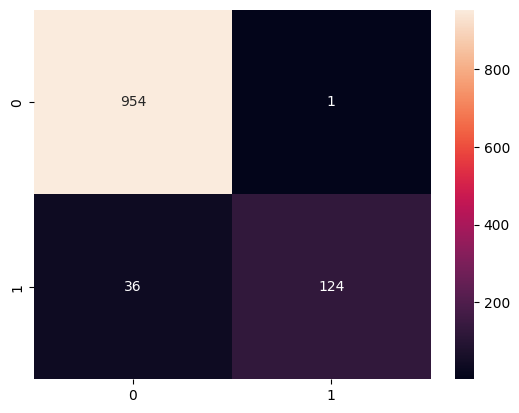

In [19]:
#  Step 8: Evaluate Performance
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d')


In [16]:
# Step 9: Predict on New Email
sample = ["Congratulations! You've won a free iPhone. Click here to claim now."]
sample_vec = vectorizer.transform(sample)
print("Prediction:", model.predict(sample_vec)[0])


Prediction: spam
